#### Load the necessary libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#### Load the dataset

In [5]:
data = pd.read_csv('heart.csv')

data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Check for null values in the dataset

In [6]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

***There are null values present in the dataset. We will replace them with the means of the respective columns.***

#### Get Simple Imputer from sklearn

In [8]:
from sklearn.impute import SimpleImputer

## create an instance of Simple Imputer 
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

# fit the data
imputer.fit(data)

SimpleImputer()

##### Replace NaN values with mean

In [10]:
imputed_data = imputer.transform(data)

imputed_data

array([[  1.        ,  39.        ,   4.        , ...,  80.        ,
         77.        ,   0.        ],
       [  0.        ,  46.        ,   2.        , ...,  95.        ,
         76.        ,   0.        ],
       [  1.        ,  48.        ,   1.        , ...,  75.        ,
         70.        ,   0.        ],
       ...,
       [  0.        ,  48.        ,   2.        , ...,  84.        ,
         86.        ,   0.        ],
       [  0.        ,  44.        ,   1.        , ...,  86.        ,
         81.96675325,   0.        ],
       [  0.        ,  52.        ,   2.        , ...,  80.        ,
        107.        ,   0.        ]])

### Change imputed data back to a dataframe

In [47]:
data_new = pd.DataFrame(imputed_data, columns = data.columns)

data_new.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0


#### Check if null values are still there

In [48]:
data_new.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

***All the null values have been removed successfully***

### Split data into training and testing datasets

In [28]:
from sklearn.model_selection import train_test_split

## we will keep 20% for testing and rest for training

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2973,1.0,55.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,280.0,134.0,85.5,29.86,80.0,75.0
3581,0.0,40.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,209.0,130.0,84.5,39.94,77.0,104.0
2883,0.0,59.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,234.0,181.0,107.0,39.40,80.0,90.0
1766,1.0,39.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,320.0,123.0,90.0,24.44,85.0,69.0
130,1.0,53.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,244.0,106.0,67.5,21.84,88.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.0,47.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0,155.0,122.5,77.5,21.34,65.0,78.0
1534,1.0,54.0,3.0,1.0,29.0,0.0,0.0,0.0,0.0,211.0,120.0,72.0,25.13,77.0,60.0
78,0.0,45.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,183.0,151.0,101.0,45.80,80.0,63.0
515,1.0,46.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,269.0,135.0,95.0,26.55,75.0,92.0


## Gaussian Naive Bayes

Let's use Naive Bayes algorithm to predict if the person will have heart disease

#### Load the libraries

In [29]:
from sklearn.naive_bayes import GaussianNB

#### Create an instance of the model

In [30]:
gaussian = GaussianNB()

#### Train the model

In [31]:
gaussian.fit(x_train, y_train)

GaussianNB()

#### Make predictions on test data

In [55]:
predictions = gaussian.predict(x_test)

#### Define function to make confusion matrix

In [56]:
# load the sklearn module for confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def get_ConfusionMatrix(y_test, predictions):
    # get the confusion matrix
    conf_mat = confusion_matrix(y_test, predictions, labels = gaussian.classes_)

    # display the confusion matrix
    display_mat = ConfusionMatrixDisplay(conf_mat, display_labels = gaussian.classes_)

    display_mat.plot()

    plt.show()

### Make Confusion Matrix

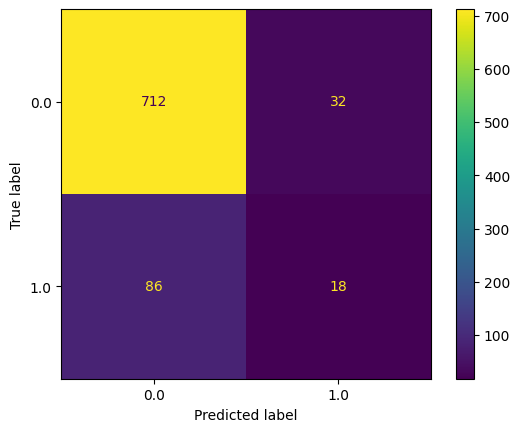

In [57]:
get_ConfusionMatrix(y_test, predictions)

#### Define function to make the classification report

In [58]:
from sklearn.metrics import classification_report

def get_report(y_test, predictions):
    target_names = ['class 0', 'class 1']

    report = classification_report(y_test, predictions, target_names = target_names)

    print(report)

### Make the classification report

In [59]:
get_report(y_test, predictions)

              precision    recall  f1-score   support

     class 0       0.89      0.96      0.92       744
     class 1       0.36      0.17      0.23       104

    accuracy                           0.86       848
   macro avg       0.63      0.57      0.58       848
weighted avg       0.83      0.86      0.84       848



## Decision Tree

Let's use Decision Tree classifier to predict if person will have heart disease or not

#### Load the libraries

In [49]:
from sklearn.tree import DecisionTreeClassifier

#### Create an instance of the model

In [50]:
treeClassifier = DecisionTreeClassifier()

#### Train the model

In [65]:
treeClassifier.fit(x_train, y_train)

DecisionTreeClassifier()

#### Make predictions on the test data

In [66]:
predictions = treeClassifier.predict(x_test)

### Make the Confusion Matrix

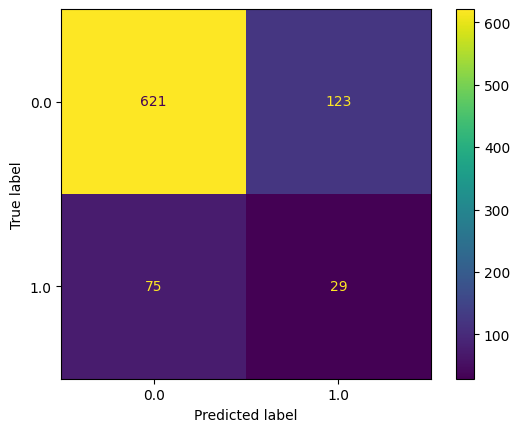

In [67]:
get_ConfusionMatrix(y_test, predictions)

### Get the Classification report

In [68]:
get_report(y_test, predictions)

              precision    recall  f1-score   support

     class 0       0.89      0.83      0.86       744
     class 1       0.19      0.28      0.23       104

    accuracy                           0.77       848
   macro avg       0.54      0.56      0.54       848
weighted avg       0.81      0.77      0.78       848



## Logistic Regression

Let's use Logistic Regression to predict if a person will have heart disease or not

#### Load the libraries

In [63]:
from sklearn.linear_model import LogisticRegression

#### Create an instance of the model

In [64]:
logisticClassifier = LogisticRegression()

### Normalize the data

In [89]:
# load the normalizer module
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# separate the data to be normalized
x_to_normalize = x.drop(['male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes'], axis = 1)
scaler.fit(x_to_normalize)

# transform the data
x_normalized = scaler.transform(x_to_normalize)

x_normalized

array([[-1.23495068,  2.00708772, -0.75797428, ...,  0.28694273,
         0.34274444, -0.21751656],
       [-0.41825733,  0.02090466, -0.75797428, ...,  0.71932499,
         1.59027451, -0.26131108],
       [-0.18491638, -0.97218687,  0.92583516, ..., -0.11350221,
        -0.07309892, -0.52407818],
       ...,
       [-0.18491638,  0.02090466,  0.92583516, ..., -0.93404582,
         0.67541912,  0.17663409],
       [-0.65159829, -0.97218687,  0.5048828 , ..., -1.63175357,
         0.84175647,  0.        ],
       [ 0.28176554,  0.02090466, -0.75797428, ..., -1.06425185,
         0.34274444,  1.09631895]])

#### Get the dataframe back after normalization

In [102]:
x_transformed = pd.DataFrame(x_normalized, columns = labels)

x_transformed.insert(value = x.male,
             loc = 0,
             column = 'male')

x_transformed = frame.assign(currentSmoker = x.currentSmoker,
                             prevalentStroke = x.prevalentStroke,
                             prevalentHyp = x.prevalentHyp, 
                             diabetes = x.diabetes)

x_transformed.head()

,male,age,education,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose,currentSmoker,prevalentStroke,prevalentHyp,diabetes
0,1.0,-1.234951,2.007088,-0.757974,-0.175844,-0.941346,-1.195907,-1.082625,0.286943,0.342744,-0.217517,0.0,0.0,0.0,0.0
1,0.0,-0.418257,0.020905,-0.757974,-0.175844,0.299595,-0.515187,-0.158988,0.719325,1.590275,-0.261311,0.0,0.0,0.0,0.0
2,1.0,-0.184916,-0.972187,0.925835,-0.175844,0.186782,-0.220209,-0.242955,-0.113502,-0.073099,-0.524078,1.0,0.0,0.0,0.0
3,0.0,1.331800,1.013996,1.767740,-0.175844,-0.264469,0.800871,1.016549,0.682474,-0.904786,0.921141,1.0,0.0,1.0,0.0
4,0.0,-0.418257,1.013996,1.178407,-0.175844,1.089284,-0.106755,0.092912,-0.663807,0.758588,0.132840,1.0,0.0,0.0,0.0


### Split data into training and testing dataset

In [106]:
x_transformed_train, x_transformed_test, y_train, y_test = train_test_split(x_transformed, y, test_size = 0.2)

x_transformed_train

,male,age,education,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose,currentSmoker,prevalentStroke,prevalentHyp,diabetes
1223,0.0,-1.234951,0.020905,0.925835,-0.175844,-1.979223,-0.469806,-0.914691,-1.106016,0.758588,-0.305106,1.0,0.0,0.0,0.0
3762,1.0,-1.234951,0.020905,0.504883,-0.175844,1.833849,-0.651331,-0.620807,0.422062,-0.904786,-0.524078,1.0,0.0,0.0,0.0
2952,0.0,0.515106,-0.972187,-0.757974,-0.175844,1.563098,2.843031,2.276054,1.547239,-0.322605,-0.611667,0.0,0.0,1.0,0.0
436,1.0,0.515106,-0.972187,-0.757974,-0.175844,-0.287031,1.708498,1.604318,0.829877,-0.322605,0.000000,0.0,0.0,1.0,0.0
480,0.0,0.165095,2.007088,-0.000260,-0.175844,1.878974,0.573965,0.176879,-0.435332,-0.073099,0.702168,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,1.0,-0.768269,-0.972187,0.925835,-0.175844,-0.693157,0.052079,0.554731,-1.000377,0.841756,0.308018,1.0,0.0,0.0,0.0
1396,1.0,-0.651598,1.013996,1.178407,-0.175844,0.795971,-0.787475,-0.578823,-0.403395,0.342744,-0.217517,1.0,0.0,0.0,0.0
544,0.0,-1.351621,1.013996,-0.757974,-0.175844,-1.482847,-1.014382,-0.998658,-0.983180,0.509082,-0.173722,0.0,0.0,0.0,0.0
1158,0.0,-0.418257,1.013996,-0.337022,-0.175844,1.224660,-1.127835,-1.502460,-0.418135,0.509082,-0.173722,1.0,0.0,0.0,0.0


#### Train the model

In [107]:
logisticClassifier.fit(x_transformed_train, y_train)

LogisticRegression()

#### Make predictions

In [109]:
logistic_pred = logisticClassifier.predict(x_transformed_test)

### Make a confusion matrix

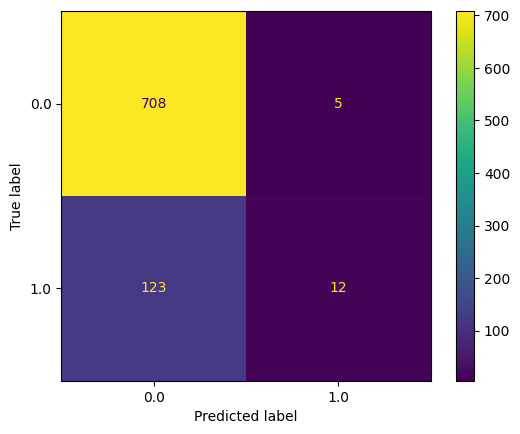

In [110]:
get_ConfusionMatrix(y_test, logistic_pred)

### Make the classification report

In [111]:
get_report(y_test, logistic_pred)

              precision    recall  f1-score   support

     class 0       0.85      0.99      0.92       713
     class 1       0.71      0.09      0.16       135

    accuracy                           0.85       848
   macro avg       0.78      0.54      0.54       848
weighted avg       0.83      0.85      0.80       848



## KNN

Let's use KNN to predict if a person will have heart disease or not

#### Load the libraries

In [112]:
from sklearn.neighbors import KNeighborsClassifier

#### Create an instance of the model

In [129]:
knn = KNeighborsClassifier(n_neighbors = 9)

#### Train the model

In [130]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

#### Make the predictions

In [131]:
predictions = knn.predict(x_test)

### Make the Confusion Matrix

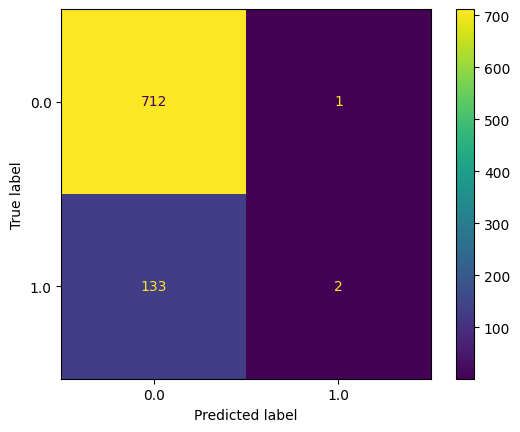

In [132]:
get_ConfusionMatrix(y_test, predictions)

### Make the Classification Report

In [133]:
get_report(y_test, predictions)

              precision    recall  f1-score   support

     class 0       0.84      1.00      0.91       713
     class 1       0.67      0.01      0.03       135

    accuracy                           0.84       848
   macro avg       0.75      0.51      0.47       848
weighted avg       0.81      0.84      0.77       848



### Through our implementation, the best results we obtained using the Gaussian Naive Bayes and Logistic Regression algorithms with accuracy of around 85%.